In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from scipy.stats import norm
from scipy.integrate import simps
from scipy.signal import savgol_filter

In [3]:
pendientes=pd.read_csv("pendientes_2020_3.csv")
pendientes["fecha"]=pd.to_datetime(pendientes["fecha"], format="%Y-%m-%d")
maximos=pd.read_csv("max_2020_3.csv")
maximos["tz_time"]=pd.to_datetime(maximos["tz_time"], format="%Y-%m-%d")


In [4]:
data=pendientes.merge(maximos,  left_on="fecha", right_on="tz_time")
data=data[["fecha","pendiente_max","page_uniques","page_views"]]
#data=data[(data.fecha.dt.month==7) | (data.fecha.dt.month==8)]
#data=data[(data.fecha.dt.month==8)]
data

,fecha,pendiente_max,page_uniques,page_views
0,2020-01-01,38781,2443792,4330158
1,2020-01-02,71441,3096608,6020902
2,2020-01-03,80161,4071519,7596133
3,2020-01-04,52674,2880565,5135154
4,2020-01-05,34012,1916196,3601356
...,...,...,...,...
214,2020-08-02,113089,3907958,7186348
215,2020-08-03,118057,3664489,7525516
216,2020-08-04,61849,3590794,7518721
217,2020-08-05,61684,3732902,7597180


In [13]:
#Datos precovid
x1=np.arange(len(data["fecha"][:61])).reshape(-1, 1)
y1=np.array(savgol_filter(data["page_uniques"][:61], 3, 1))
reg1=LinearRegression().fit(x1, y1)
m1=reg.coef_
b1=reg.intercept_


In [14]:
#Datos covid
x2=np.arange(len(data["fecha"][62:180])).reshape(-1, 1)
y2=np.array(savgol_filter(data["page_uniques"][62:180], 3, 1))
reg2=LinearRegression().fit(x2, y2)
m2=reg.coef_
b2=reg.intercept_


In [15]:
#Datos postcovid
x3=np.arange(len(data["fecha"][181:214])).reshape(-1, 1)
y3=np.array(savgol_filter(data["page_uniques"][181:214], 3, 1))
reg3=LinearRegression().fit(x3, y3)
m3=reg.coef_
b3=reg.intercept_


In [8]:
x=np.array(data["pendiente_max"][1:]).reshape(-1, 1)
y=np.array(data["page_views"][1:])
reg=LinearRegression().fit(x, y)
m=reg.coef_
b=reg.intercept_

In [15]:
77851*m+b

array([-21155765.8026356])

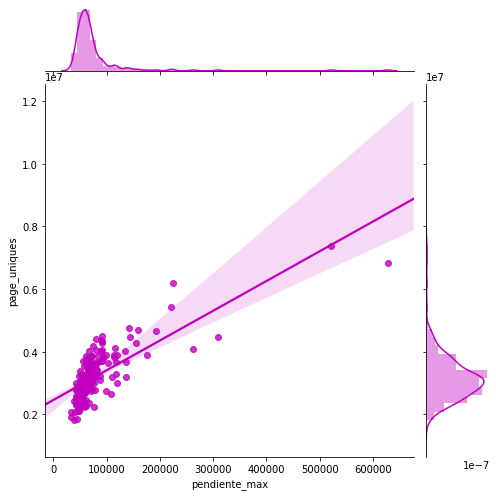

In [13]:
sns.jointplot("pendiente_max", "page_uniques", data=data,kind="reg", truncate=False,color="m", height=7)

Text(0, 0.5, 'Usuarios Unicos')

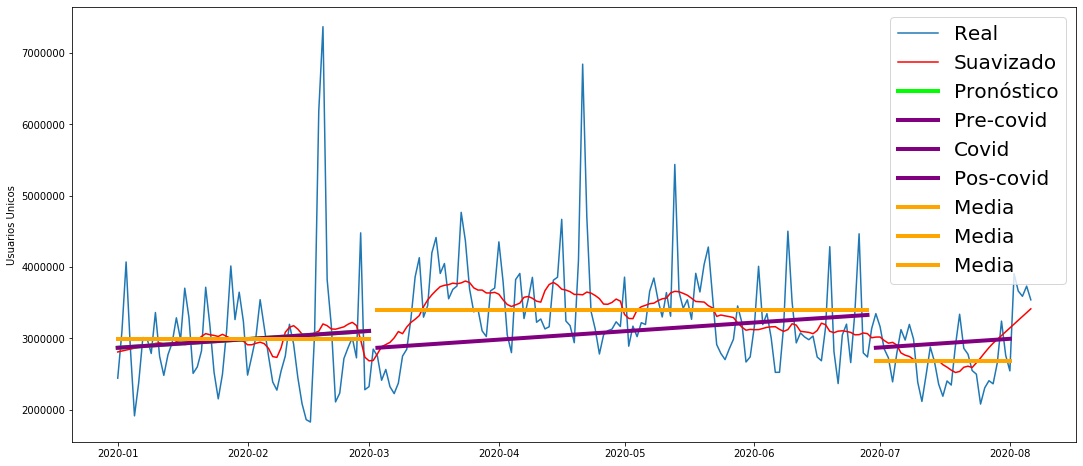

In [18]:
#Análisis por etapas de visitas
plt.figure(figsize=(18,8))
plt.plot(data["fecha"],data["page_uniques"],label="Real")
plt.plot(data["fecha"],savgol_filter(data["page_uniques"], 19, 1), color='red', label="Suavizado")
plt.plot(data["fecha"][:61],np.arange(len(data["fecha"][:61]))*m+b,color="lime", lw=4,label="Pronóstico")
plt.plot(data["fecha"][:61],np.arange(len(data["fecha"][:61]))*m+b,color="purple", lw=4,label="Pre-covid")
plt.plot(data["fecha"][62:180],np.arange(len(data["fecha"][62:180]))*m+b,color="purple", lw=4,label="Covid")
plt.plot(data["fecha"][181:214],np.arange(len(data["fecha"][181:214]))*m+b,color="purple", lw=4,label="Pos-covid")
#Medias por etapas
plt.plot(data["fecha"][:61],[data["page_uniques"][:61].mean()]*len(data["page_uniques"][:61]),color="orange", lw=4,label="Media")
plt.plot(data["fecha"][62:180],[data["page_uniques"][62:180].mean()]*len(data["page_uniques"][62:180]),color="orange", lw=4,label="Media")
plt.plot(data["fecha"][181:214],[data["page_uniques"][181:214].mean()]*len(data["page_uniques"][181:214]),color="orange", lw=4,label="Media")
plt.legend(fontsize=20)
plt.ylabel("Usuarios Unicos")

In [46]:
#Análisis de datos desde la etapa covid hasta poscovid
x=np.arange(len(data["fecha"][60:214])).reshape(-1, 1)
y=np.array(savgol_filter(data["page_uniques"][60:214], 3, 1))
reg=LinearRegression().fit(x, y)
m=reg.coef_
b=reg.intercept_

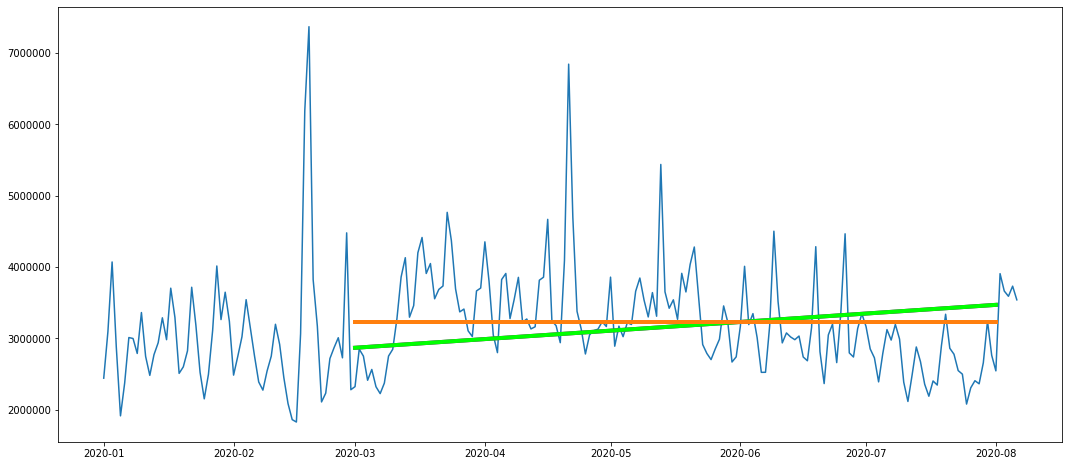

In [49]:
plt.figure(figsize=(18,8))
plt.plot(data["fecha"],data["page_uniques"],label="Real")
plt.plot(data["fecha"][60:214],np.arange(len(data["fecha"][60:214]))*m+b,color="purple", lw=4,label="Media")
plt.plot(data["fecha"][60:214],np.arange(len(data["fecha"][60:214]))*m+b,color="lime", lw=4,label="Media")
#Media de la gráfica
plt.plot(data["fecha"][60:214],[data["page_uniques"][60:214].mean()]*len(data["page_uniques"][60:214]),lw=4)



In [48]:
#Medias por etapas
media_pre = data["page_uniques"][:61].mean()
media_covid = data["page_uniques"][62:180].mean()
media_pos = data["page_uniques"][181:214].mean()


2997922.819672131

In [84]:
#Porcentaje precovid a covid
porcentaje1 = (data[61:180].page_uniques.mean() - (data[:61].page_uniques.mean())) / data[:61].page_uniques.mean()
porcentaje2 = (data[214:].page_uniques.mean() - (data[61:180].page_uniques.mean())) / data[61:180].page_uniques.mean()
porcentajeGlobal = (data[214:].page_uniques.mean() - (data[:61].page_uniques.mean())) / data[:61].page_uniques.mean()

In [85]:
#[porcentaje1] * len(data["page_uniques"][62:180])
#[porcentaje2] * len(data["page_uniques"][180:214])
porcentaje1 = porcentaje1 * 100
porcentaje2 = porcentaje2 * 100
porcentajeGlobal = porcentajeGlobal * 100
porcentaje1 = "{0:.2f}".format(porcentaje1)
porcentaje2 = "{0:.2f}".format(porcentaje2)
porcentajeGlobal = "{0:.2f}".format(porcentajeGlobal)



In [89]:
datafr = pd.DataFrame({"Media":[media_pre,media_covid,media_pos,"Sin cambio"],"Porcentaje Cambio":["Sin cambio",porcentaje1,porcentaje2,porcentajeGlobal]})
datafr.rename(index={0:'Pre covid',1:'Covid',2:'Pos covid',3:'Global'}, inplace=True)
datafr

,Media,Porcentaje Cambio
Pre covid,2.99792e+06,Sin cambio
Covid,3.39587e+06,13.12
Pos covid,2.68878e+06,8.73
Global,Sin cambio,23.00
